In [401]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import bartlett, f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison
from scipy.stats import chi2_contingency

 

import warnings
warnings.filterwarnings("ignore")

In [48]:
#pip install pandas_profiling


In [49]:
avocado = pd.read_csv('https://raw.githubusercontent.com/woz-u/DS-Student-Resources/main/DS105-Intermediate-Statistics/Data/avocados.csv')
avocado.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,12/27/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,12/20/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,12/13/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,12/6/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,11/29/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


## Step One
---

#### Read in your data

In [50]:
### start code
avocado = pd.read_csv('https://raw.githubusercontent.com/woz-u/DS-Student-Resources/main/DS105-Intermediate-Statistics/Data/avocados.csv')
avocado.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,12/27/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,12/20/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,12/13/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,12/6/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,11/29/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [51]:
### start code
avocado = pd.read_csv('https://raw.githubusercontent.com/woz-u/DS-Student-Resources/main/DS105-Intermediate-Statistics/Data/avocados.csv')
avocado = avocado.iloc[:,1:]
avocado.head()
### end code

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,12/27/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,12/20/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,12/13/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,12/6/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,11/29/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


### Exploratory Data Analysis in 1 step

In [52]:
profile = ProfileReport(avocado)
#profile allows you to see the report in the notebook.
#profile.to_file(output_file='/path/to/my_report.html')
profile.to_file(output_file="C:/Users/marga/Documents/WozU/Instructor/Entity Accelerated FP/my_report.html")

#profile.to_file(output_file='mydata_report.html') sends the report to same file you're in. 

```Overview: This section provides basic information about the DataFrame, 
such as the number of rows and columns, the variable types, and the 
memory usage.

Variables: This section provides detailed information about each variable 
in the DataFrame, including the number of missing values, the data type,
the distinct values, and basic descriptive statistics such as mean, 
standard deviation, and quartiles.

Correlations: This section provides information about the pairwise 
correlations between the variables in the DataFrame, including a 
correlation matrix and a heatmap visualization.

Sample: This section shows a sample of the data in the DataFrame, 
allowing you to inspect individual rows and columns.

Missing Values: This section provides information about the missing 
values in the DataFrame, including the number and percentage of missing 
values in each variable, and a visualization of the missing data pattern.

Duplicate Rows: This section provides information about the presence 
of duplicate rows in the DataFrame, including the number of duplicate 
rows and a preview of the duplicated rows.

Overall, the pandas-profiling report is a useful tool for quickly 
gaining insights into the structure and content of a pandas DataFrame, 
identifying potential data quality issues, and generating a detailed 
summary of the data that can be used for further analysis or reporting.
```

SyntaxError: invalid syntax (3498569370.py, line 8)

## Step Two - Exploratory Data Analysis
---
#### Check number of rows and columns

In [53]:
avocado.shape

(18249, 13)

In [54]:
print(f'Rows: {avocado.shape[0]}')
print(f'Columns: {avocado.shape[1]}')

Rows: 18249
Columns: 13


## Step Three
---

In [55]:
#print unique values for type column
avocado.type.unique()

array(['conventional', 'organic'], dtype=object)

In [56]:
avocado.type.value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [57]:
avocado.region.value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

In [134]:
#print unique values for region column
avocado.region.unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [135]:
avocado.region.describe()

count      18249
unique        54
top       Albany
freq         338
Name: region, dtype: object

In [178]:
avocado.AveragePrice.describe()

count    18249.000000
mean         1.405978
std          0.402677
min          0.440000
25%          1.100000
50%          1.370000
75%          1.660000
max          3.250000
Name: AveragePrice, dtype: float64

In [179]:
avocado['Total Volume'].describe()

count    1.824900e+04
mean     8.506440e+05
std      3.453545e+06
min      8.456000e+01
25%      1.083858e+04
50%      1.073768e+05
75%      4.329623e+05
max      6.250565e+07
Name: Total Volume, dtype: float64

In [137]:
print(avocado.columns)

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')


## Step Four (a)- Data Wrangling
---
#### Filter for 3 cities
Focusing on the Three Categories
The data has many more categories than three, so we will need to filter the dataset by the categories you want. The code below makes a list of the categories you want to keep, then searches through the Category column using the isin() function to keep only those that match.



In [139]:
avocado_rand = avocado[avocado.region.isin(['Atlanta', 'Denver', 'MiamiFtLauderdale'])]
avocado_rand.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
52,12/27/2015,0.99,386100.49,292097.36,27350.92,297.90,66354.31,48605.95,17748.36,0.00,conventional,2015,Atlanta
53,12/20/2015,1.08,331377.53,251774.15,20702.45,103.06,58797.87,46930.26,11867.61,0.00,conventional,2015,Atlanta
54,12/13/2015,0.96,417772.47,324932.28,31019.08,275.80,61545.31,38903.57,22628.21,13.53,conventional,2015,Atlanta
55,12/6/2015,1.07,357636.82,283024.01,23740.85,181.92,50690.04,37032.67,13654.66,2.71,conventional,2015,Atlanta
56,11/29/2015,0.99,333280.79,250288.65,28889.63,307.83,53794.68,33031.72,20738.55,24.41,conventional,2015,Atlanta


In [140]:
avocado_rand.tail()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
17896,2/4/2018,1.50,9193.30,261.74,589.27,0.0,8342.29,7622.22,720.07,0.0,organic,2018,MiamiFtLauderdale
17897,1/28/2018,1.43,7883.77,162.09,272.81,0.0,7448.87,7448.87,0.00,0.0,organic,2018,MiamiFtLauderdale
17898,1/21/2018,1.46,7557.32,127.92,285.41,0.0,7143.99,7143.99,0.00,0.0,organic,2018,MiamiFtLauderdale
17899,1/14/2018,1.44,7957.68,50.65,203.70,0.0,7703.33,7700.00,3.33,0.0,organic,2018,MiamiFtLauderdale
17900,1/7/2018,1.47,7496.04,52.94,293.77,0.0,7149.33,7135.99,13.34,0.0,organic,2018,MiamiFtLauderdale


In [141]:
avocado_rand.region.describe()

count        1014
unique          3
top       Atlanta
freq          338
Name: region, dtype: object

In [142]:
avocado_rand.region.value_counts()

Atlanta              338
Denver               338
MiamiFtLauderdale    338
Name: region, dtype: int64

## Step Five (a) - Data Wrangling
---
#### recode 'type' and 'region' columns

In [143]:
def recode(series):
    if series == 'conventional':
        return 0
    if series == 'organic':
        return 1
    
avocado_rand['typeR'] = avocado_rand['type'].apply(recode)

In [144]:
avocado_rand.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,typeR
52,12/27/2015,0.99,386100.49,292097.36,27350.92,297.90,66354.31,48605.95,17748.36,0.00,conventional,2015,Atlanta,0
53,12/20/2015,1.08,331377.53,251774.15,20702.45,103.06,58797.87,46930.26,11867.61,0.00,conventional,2015,Atlanta,0
54,12/13/2015,0.96,417772.47,324932.28,31019.08,275.80,61545.31,38903.57,22628.21,13.53,conventional,2015,Atlanta,0
55,12/6/2015,1.07,357636.82,283024.01,23740.85,181.92,50690.04,37032.67,13654.66,2.71,conventional,2015,Atlanta,0
56,11/29/2015,0.99,333280.79,250288.65,28889.63,307.83,53794.68,33031.72,20738.55,24.41,conventional,2015,Atlanta,0


In [145]:
avocado_rand.tail()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,typeR
17896,2/4/2018,1.50,9193.30,261.74,589.27,0.0,8342.29,7622.22,720.07,0.0,organic,2018,MiamiFtLauderdale,1
17897,1/28/2018,1.43,7883.77,162.09,272.81,0.0,7448.87,7448.87,0.00,0.0,organic,2018,MiamiFtLauderdale,1
17898,1/21/2018,1.46,7557.32,127.92,285.41,0.0,7143.99,7143.99,0.00,0.0,organic,2018,MiamiFtLauderdale,1
17899,1/14/2018,1.44,7957.68,50.65,203.70,0.0,7703.33,7700.00,3.33,0.0,organic,2018,MiamiFtLauderdale,1
17900,1/7/2018,1.47,7496.04,52.94,293.77,0.0,7149.33,7135.99,13.34,0.0,organic,2018,MiamiFtLauderdale,1


In [146]:
avocado_rand.typeR.value_counts()

0    507
1    507
Name: typeR, dtype: int64

In [366]:
def recode(series):
    if series == 'Atlanta':
        return 0
    if series == 'Denver':
        return 1
    if series == 'MiamiFtLauderdale':
        return 2
    
avocado_rand['regionR'] = avocado_rand['region'].apply(recode)

In [148]:
avocado_rand.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,typeR,regionR
52,12/27/2015,0.99,386100.49,292097.36,27350.92,297.90,66354.31,48605.95,17748.36,0.00,conventional,2015,Atlanta,0,0
53,12/20/2015,1.08,331377.53,251774.15,20702.45,103.06,58797.87,46930.26,11867.61,0.00,conventional,2015,Atlanta,0,0
54,12/13/2015,0.96,417772.47,324932.28,31019.08,275.80,61545.31,38903.57,22628.21,13.53,conventional,2015,Atlanta,0,0
55,12/6/2015,1.07,357636.82,283024.01,23740.85,181.92,50690.04,37032.67,13654.66,2.71,conventional,2015,Atlanta,0,0
56,11/29/2015,0.99,333280.79,250288.65,28889.63,307.83,53794.68,33031.72,20738.55,24.41,conventional,2015,Atlanta,0,0


In [149]:
avocado_rand.regionR.unique()

array([0, 1, 2], dtype=int64)

In [150]:
avocado_rand.regionR.value_counts()

0    338
1    338
2    338
Name: regionR, dtype: int64

In [151]:
avocado_rand.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,typeR,regionR
52,12/27/2015,0.99,386100.49,292097.36,27350.92,297.90,66354.31,48605.95,17748.36,0.00,conventional,2015,Atlanta,0,0
53,12/20/2015,1.08,331377.53,251774.15,20702.45,103.06,58797.87,46930.26,11867.61,0.00,conventional,2015,Atlanta,0,0
54,12/13/2015,0.96,417772.47,324932.28,31019.08,275.80,61545.31,38903.57,22628.21,13.53,conventional,2015,Atlanta,0,0
55,12/6/2015,1.07,357636.82,283024.01,23740.85,181.92,50690.04,37032.67,13654.66,2.71,conventional,2015,Atlanta,0,0
56,11/29/2015,0.99,333280.79,250288.65,28889.63,307.83,53794.68,33031.72,20738.55,24.41,conventional,2015,Atlanta,0,0


## (1) How do the 3 Cities  Total Volume of Avocado consumption compare to each other?

## Step Six a ANOVA
---
#### Test for assumptions

- Normality
- Homogeneity of Variance
- Sample Size > 20
- Independence
- Sphercity

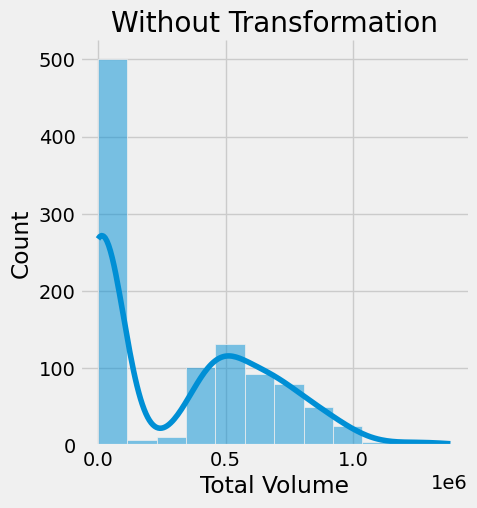

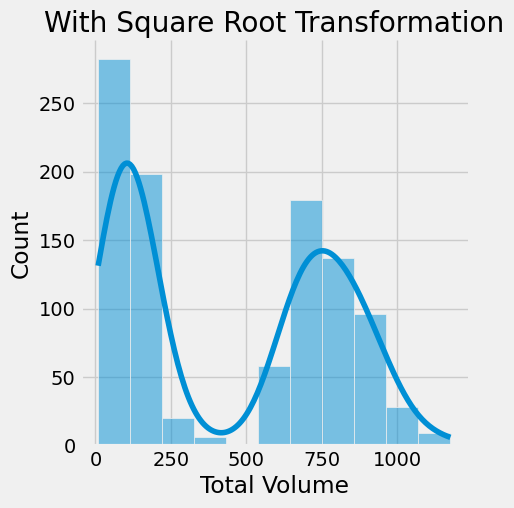

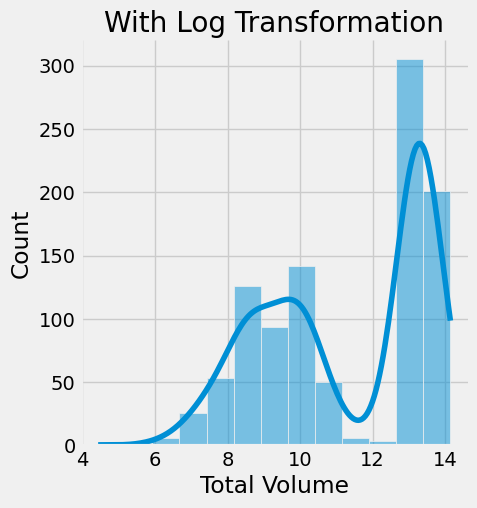

In [285]:
plt.style.use('fivethirtyeight')

#Without Transformation
sns.displot(avocado_rand['Total Volume'], kde = True).set(title='Without Transformation')

#With Square Root Transformation
sns.displot(np.sqrt(avocado_rand['Total Volume']), kde = True).set(title='With Square Root Transformation')

#With Log Transformation
sns.displot(np.log(avocado_rand['Total Volume']), kde = True).set(title='With Log Transformation')

plt.savefig('displot.png')

In [153]:
#perform log transformation
avocado_rand['Total Volume_log'] = np.log(avocado_rand['Total Volume'])

In [154]:
bartlett(avocado_rand["Total Volume_log"], avocado_rand["regionR"])

BartlettResult(statistic=874.0018642024663, pvalue=4.401442106930616e-192)

In [155]:
bartlett(avocado_rand["Total Volume"], avocado_rand["regionR"])

BartlettResult(statistic=24760.013711529777, pvalue=0.0)

In [402]:
#In both cases, the null hypothesis is that the variances of the two variables are equal. A significant result indicates that the variances are not equal




In [157]:
#Sample size: must have a least 20 cases per independent variable
#Independence: no overlap between your groups and that the levels you are testing are not related in some way
#Sphericity: (for between subjects designs only, usually when you are dealing with the same variables at different times)

In [158]:
f_oneway(
    avocado["Total Volume"][avocado["region"]=='Atlanta'],
    avocado["Total Volume"][avocado["region"]=='Denver'],
    avocado["Total Volume"][avocado["region"]=='MiamiFtLauderdale']
)

F_onewayResult(statistic=19.7994310051585, pvalue=3.675725187627539e-09)

In [159]:
#explain your results
#Since the p value is less than .05, there is a significant difference in between these three categories.


In [160]:
postHocResults = MultiComparison(avocado_rand["Total Volume_log"], avocado_rand["region"]).tukeyhsd()
print(postHocResults)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
 group1       group2      meandiff p-adj   lower   upper  reject
----------------------------------------------------------------
Atlanta            Denver   0.7625    0.0  0.3742  1.1509   True
Atlanta MiamiFtLauderdale  -0.5392 0.0033 -0.9276 -0.1509   True
 Denver MiamiFtLauderdale  -1.3018    0.0 -1.6901 -0.9134   True
----------------------------------------------------------------


In [161]:
postHocResults = MultiComparison(avocado_rand["Total Volume"], avocado_rand["region"]).tukeyhsd()
print(postHocResults)

             Multiple Comparison of Means - Tukey HSD, FWER=0.05             
 group1       group2        meandiff   p-adj     lower        upper    reject
-----------------------------------------------------------------------------
Atlanta            Denver  148808.9264    0.0   89642.5578 207975.2951   True
Atlanta MiamiFtLauderdale   26828.7136 0.5365  -32337.6551  85995.0822  False
 Denver MiamiFtLauderdale -121980.2129    0.0 -181146.5816 -62813.8442   True
-----------------------------------------------------------------------------


#### Interpret or explain your results:
This output provides you with the mean difference in the number of reviews per comparison, plus the confidence interval (lower and upper columns), 
and whether or not you can reject the null hypothesis. If the value in the reject column is True, then this means there was a significant difference in the means between those groups. 

So, there is a significant difference between the consumption of Avocados between all 3 of the Cities. 

GIn other words, Atlanta and Denver have significantly different total volume, as well as MiamiFtLauderdale, but Atlanta and MiamiFtLauderdale do not have significantly different total volume

## Step Seven a : Determine Means and Draw Conclusions


In [162]:
avocado_rand_1 = avocado_rand[['region', 'Total Volume']]

avocado_rand_1.groupby('region').mean().round(2)

,Total Volume
region,
Atlanta,262145.32
Denver,410954.25
MiamiFtLauderdale,288974.04


In [403]:
#explain your results
#p-value less than0.05 indicates that for both tests the null hypothesis can be rejected, and there is evidence for the alternative hypothesis.


## (2) How do the 3 Cities Average Price of Avocados compare to each other?

## Step Six b ANOVA
---
#### Test for assumptions

- Normality
- Homogeneity of Variance
- Sample Size > 20
- Independence
- Sphercity

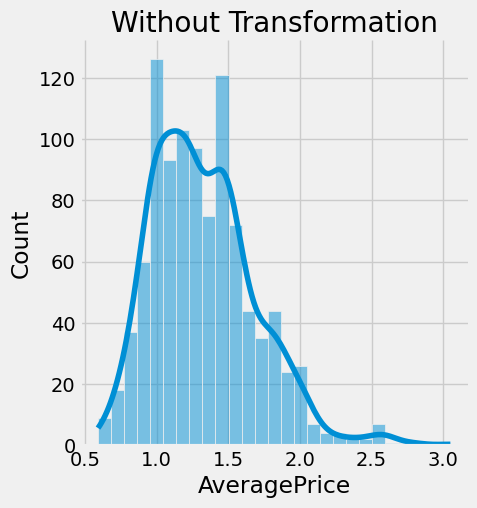

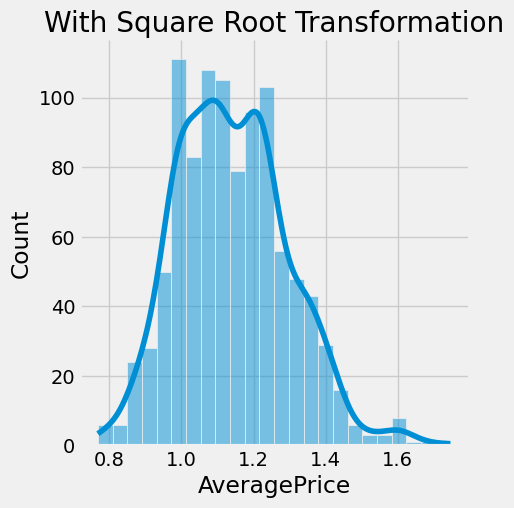

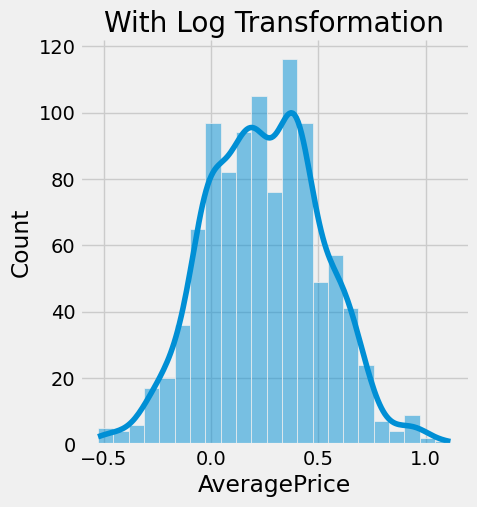

In [164]:
plt.style.use('fivethirtyeight')

#Without Transformation
sns.displot(avocado_rand['AveragePrice'], kde = True).set(title='Without Transformation')

#With Square Root Transformation
sns.displot(np.sqrt(avocado_rand['AveragePrice']), kde = True).set(title='With Square Root Transformation')

#With Log Transformation
sns.displot(np.log(avocado_rand['AveragePrice']), kde = True).set(title='With Log Transformation')

In [398]:
#perform log transformation
avocado_rand['AveragePrice_log'] = np.log(avocado_rand['AveragePrice'])

In [399]:
bartlett(avocado_rand["AveragePrice_log"], avocado_rand["regionR"])

BartlettResult(statistic=1067.6487475214396, pvalue=3.5509144224084957e-234)

In [400]:
bartlett(avocado_rand["AveragePrice"], avocado_rand["regionR"])

BartlettResult(statistic=605.3586001656699, pvalue=1.1435875347586993e-133)

In [168]:
#explain your results
#You are looking for a non-significant test. The null hypothesis for both of these is that the data has equal variance, so you'd like to have a p value of > .05.
#The p value associated with this test is < .05, which means that unfortunately, you have violated the assumption of homogeneity of variance. However, we know that each city doesn't
#impact the other cities chosen.  So we will move ahead. 


In [169]:
#Sample size: must have a least 20 cases per independent variable
#Independence: no overlap between your groups and that the levels you are testing are not related in some way
#Sphericity: (for between subjects designs only, usually when you are dealing with the same variables at different times)

In [170]:
f_oneway(
    avocado["AveragePrice"][avocado["region"]=='Atlanta'],
    avocado["AveragePrice"][avocado["region"]=='Denver'],
    avocado["AveragePrice"][avocado["region"]=='MiamiFtLauderdale']
)

F_onewayResult(statistic=30.1395769487044, pvalue=1.9316015332863168e-13)

In [404]:
#explain your results
#The p-value <0.05), so we reject the null hypothesis


In [172]:
postHocResults = MultiComparison(avocado_rand["AveragePrice_log"], avocado_rand["region"]).tukeyhsd()
print(postHocResults)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
 group1       group2      meandiff p-adj   lower   upper  reject
----------------------------------------------------------------
Atlanta            Denver  -0.0848 0.0001 -0.1314 -0.0381   True
Atlanta MiamiFtLauderdale    0.081 0.0001  0.0344  0.1276   True
 Denver MiamiFtLauderdale   0.1658    0.0  0.1191  0.2124   True
----------------------------------------------------------------


In [173]:
    postHocResults = MultiComparison(avocado_rand["AveragePrice"], avocado_rand["region"]).tukeyhsd()
    print(postHocResults)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
 group1       group2      meandiff p-adj  lower   upper  reject
---------------------------------------------------------------
Atlanta            Denver  -0.1194    0.0 -0.183 -0.0557   True
Atlanta MiamiFtLauderdale   0.0905 0.0025 0.0269  0.1542   True
 Denver MiamiFtLauderdale   0.2099    0.0 0.1463  0.2736   True
---------------------------------------------------------------


#### Interpret or explain your results:
This output provides you with the mean difference in the number of reviews per comparison, plus the confidence interval (lower and upper columns), 
and whether or nThe first set of results shows the pairwise comparisons between the three regions (Atlanta, Denver, and MiamiFtLauderdale) for the log-transformed average price of avocados. The Tukey HSD test is used to compare all pairs of means and identify if there is a significant difference between them.

The results show that there are significant differences between all pairs of means at a significance level of 0.05, as indicated by the "reject" column. The mean log-transformed price in Denver is significantly lower than in Atlanta and MiamiFtLauderdale, while the mean log-transformed price in MiamiFtLauderdale is significantly higher than in Atlanta and Denver.

The second set shows the pairwise comparisons between the same three regions, but this time for thr(raw) average price of avocados. The Tukey HSD test also used agian
The results show that there are also significant differences between all pairs of means at a significance level of 0.05. The mean price in Denver the lowest ,while the mean price in MiamiFtLauderdale is the highest among the three

Overall, both sets of results suggest that there are significant differences in average avocado prices across the three regions.

so you can reject the null hypothesis. If the value in the reject column is True, then this means there was a significant difference in the means between those groups. 

So, there is a significant difference between the consumption of Avocados between all 3 of the Cities. 

Go on to step 7 to find out what the differences are: 


## Step Seven b : Determine Means and Draw Conclusions


In [174]:
avocado_rand_2= avocado_rand[['region', 'AveragePrice']]

avocado_rand_2.groupby('region').mean().round(2)

,AveragePrice
region,
Atlanta,1.34
Denver,1.22
MiamiFtLauderdale,1.43


## (3) How do different regions compare to each other in Avocado consumptions using the total bags sold

In [270]:
avocado['Total Bags'].describe()
# for Questions 3 & 4 

count    1.824900e+04
mean     2.396392e+05
std      9.862424e+05
min      0.000000e+00
25%      5.088640e+03
50%      3.974383e+04
75%      1.107834e+05
max      1.937313e+07
Name: Total Bags, dtype: float64

## Step Four (b)- Data Wrangling
---
#### Filter for 6 region
Focusing on the 6 regions around the US 
The data has many more categories than three, so we will need to filter the dataset by the categories you want. The code below makes a list of the categories you want to keep, then searches through the Category column using the isin() function to keep only those that match.


In [180]:
avocado_reg = avocado[avocado.region.isin(['GreatLakes', 'Midsouth', 'Northeast', 'Plains', 'Southeast', 'West'])]
avocado_reg.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
780,12/27/2015,1.01,2580602.96,336673.70,1411808.83,254629.93,577490.50,400003.80,98401.09,79085.61,conventional,2015,GreatLakes
781,12/20/2015,1.01,2504745.45,383701.76,1337404.03,241580.61,542059.05,358218.65,122999.48,60840.92,conventional,2015,GreatLakes
782,12/13/2015,1.03,2608448.06,463349.67,1342449.84,228576.54,574072.01,409909.70,148004.93,16157.38,conventional,2015,GreatLakes
783,12/6/2015,1.00,2981347.20,401676.14,1680591.43,398320.64,500758.99,325850.00,124306.44,50602.55,conventional,2015,GreatLakes
784,11/29/2015,1.07,2198408.92,318661.40,1199426.12,248818.72,431502.68,328369.47,83149.01,19984.20,conventional,2015,GreatLakes


In [182]:
avocado_reg.tail()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,typeR
18232,2/4/2018,1.41,283378.47,22474.66,55360.49,133.41,205409.91,70232.59,134666.91,510.41,organic,2018,West,1
18233,1/28/2018,1.80,185974.53,22918.40,33051.14,93.52,129911.47,77822.23,51986.86,102.38,organic,2018,West,1
18234,1/21/2018,1.83,189317.99,27049.44,33561.32,439.47,128267.76,76091.99,51947.50,228.27,organic,2018,West,1
18235,1/14/2018,1.82,207999.67,33869.12,47435.14,433.52,126261.89,89115.78,37133.99,12.12,organic,2018,West,1
18236,1/7/2018,1.48,297190.60,34734.97,62967.74,157.77,199330.12,103761.55,95544.39,24.18,organic,2018,West,1


In [186]:
avocado_reg.region.describe()

count           2028
unique             6
top       GreatLakes
freq             338
Name: region, dtype: object

In [184]:
avocado_reg.region.value_counts()

GreatLakes    338
Midsouth      338
Northeast     338
Plains        338
Southeast     338
West          338
Name: region, dtype: int64

## Step Five (b) - Data Wrangling
---
#### recode 'type' and 'region' columns

In [212]:
def recode(series):
    if series == 'conventional':
        return 0
    if series == 'organic':
        return 1
    
avocado_reg['typeR'] = avocado_reg['type'].apply(recode)

In [213]:
avocado_reg.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,typeR,typeR1,regionR1
780,12/27/2015,1.01,2580602.96,336673.70,1411808.83,254629.93,577490.50,400003.80,98401.09,79085.61,conventional,2015,GreatLakes,0,0,0
781,12/20/2015,1.01,2504745.45,383701.76,1337404.03,241580.61,542059.05,358218.65,122999.48,60840.92,conventional,2015,GreatLakes,0,0,0
782,12/13/2015,1.03,2608448.06,463349.67,1342449.84,228576.54,574072.01,409909.70,148004.93,16157.38,conventional,2015,GreatLakes,0,0,0
783,12/6/2015,1.00,2981347.20,401676.14,1680591.43,398320.64,500758.99,325850.00,124306.44,50602.55,conventional,2015,GreatLakes,0,0,0
784,11/29/2015,1.07,2198408.92,318661.40,1199426.12,248818.72,431502.68,328369.47,83149.01,19984.20,conventional,2015,GreatLakes,0,0,0


In [214]:
avocado_reg.tail()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,typeR,typeR1,regionR1
18232,2/4/2018,1.41,283378.47,22474.66,55360.49,133.41,205409.91,70232.59,134666.91,510.41,organic,2018,West,1,1,5
18233,1/28/2018,1.80,185974.53,22918.40,33051.14,93.52,129911.47,77822.23,51986.86,102.38,organic,2018,West,1,1,5
18234,1/21/2018,1.83,189317.99,27049.44,33561.32,439.47,128267.76,76091.99,51947.50,228.27,organic,2018,West,1,1,5
18235,1/14/2018,1.82,207999.67,33869.12,47435.14,433.52,126261.89,89115.78,37133.99,12.12,organic,2018,West,1,1,5
18236,1/7/2018,1.48,297190.60,34734.97,62967.74,157.77,199330.12,103761.55,95544.39,24.18,organic,2018,West,1,1,5


In [215]:
avocado_reg.typeR.value_counts()

0    1014
1    1014
Name: typeR, dtype: int64

In [216]:
def recode(series):
    if series == 'GreatLakes':
        return 0
    if series == 'Midsouth':
        return 1
    if series == 'Northeast':
        return 2
    if series == 'Plains':
        return 3
    if series == 'Southeast':
        return 4
    if series == 'West':
        return 5
    
avocado_reg['regionR1'] = avocado_reg['region'].apply(recode)

In [217]:
avocado_reg.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,typeR,typeR1,regionR1
780,12/27/2015,1.01,2580602.96,336673.70,1411808.83,254629.93,577490.50,400003.80,98401.09,79085.61,conventional,2015,GreatLakes,0,0,0
781,12/20/2015,1.01,2504745.45,383701.76,1337404.03,241580.61,542059.05,358218.65,122999.48,60840.92,conventional,2015,GreatLakes,0,0,0
782,12/13/2015,1.03,2608448.06,463349.67,1342449.84,228576.54,574072.01,409909.70,148004.93,16157.38,conventional,2015,GreatLakes,0,0,0
783,12/6/2015,1.00,2981347.20,401676.14,1680591.43,398320.64,500758.99,325850.00,124306.44,50602.55,conventional,2015,GreatLakes,0,0,0
784,11/29/2015,1.07,2198408.92,318661.40,1199426.12,248818.72,431502.68,328369.47,83149.01,19984.20,conventional,2015,GreatLakes,0,0,0


In [218]:
avocado_reg.regionR1.unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [219]:
avocado_reg.regionR1.value_counts()

0    338
1    338
2    338
3    338
4    338
5    338
Name: regionR1, dtype: int64

In [220]:
avocado_reg.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,typeR,typeR1,regionR1
780,12/27/2015,1.01,2580602.96,336673.70,1411808.83,254629.93,577490.50,400003.80,98401.09,79085.61,conventional,2015,GreatLakes,0,0,0
781,12/20/2015,1.01,2504745.45,383701.76,1337404.03,241580.61,542059.05,358218.65,122999.48,60840.92,conventional,2015,GreatLakes,0,0,0
782,12/13/2015,1.03,2608448.06,463349.67,1342449.84,228576.54,574072.01,409909.70,148004.93,16157.38,conventional,2015,GreatLakes,0,0,0
783,12/6/2015,1.00,2981347.20,401676.14,1680591.43,398320.64,500758.99,325850.00,124306.44,50602.55,conventional,2015,GreatLakes,0,0,0
784,11/29/2015,1.07,2198408.92,318661.40,1199426.12,248818.72,431502.68,328369.47,83149.01,19984.20,conventional,2015,GreatLakes,0,0,0


## Step Six c ANOVA
---
#### Test for assumptions

- Normality
- Homogeneity of Variance
- Sample Size > 20
- Independence
- Sphercity

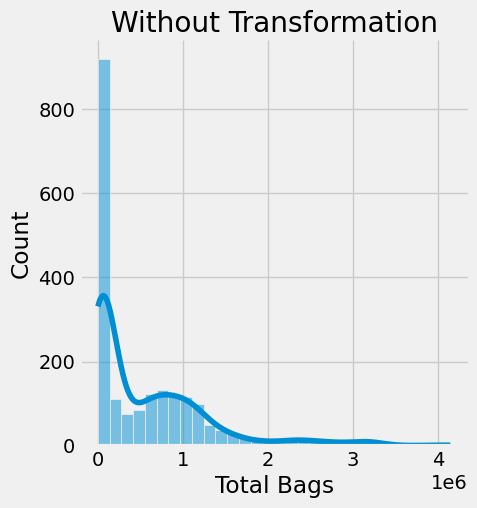

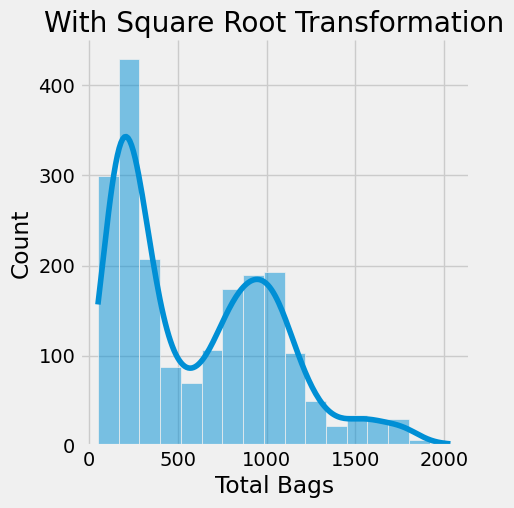

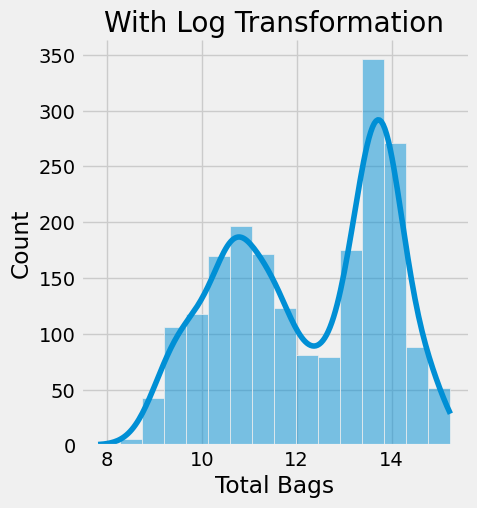

In [228]:
plt.style.use('fivethirtyeight')

#Without Transformation
sns.displot(avocado_reg['Total Bags'], kde = True).set(title='Without Transformation')

#With Square Root Transformation
sns.displot(np.sqrt(avocado_reg['Total Bags']), kde = True).set(title='With Square Root Transformation')

#With Log Transformation
sns.displot(np.log(avocado_reg['Total Bags']), kde = True).set(title='With Log Transformation')

In [260]:
#perform log transformation
avocado_reg['Total Bags_log'] = np.log(avocado_reg['Total Bags'])

In [261]:
print(avocado_reg['Total Bags_log'])

780      13.266447
781      13.203130
782      13.260510
783      13.123880
784      12.975029
           ...    
18232    12.232763
18233    11.774608
18234    11.761875
18235    11.746114
18236    12.202718
Name: Total Bags_log, Length: 2028, dtype: float64


In [262]:
bartlett(avocado_reg["Total Bags_log"], avocado_reg["regionR1"])

BartlettResult(statistic=0.35006795600717766, pvalue=0.5540746643459303)

In [263]:
bartlett(avocado_reg["Total Bags"], avocado_reg["regionR1"])

BartlettResult(statistic=49536.79042771479, pvalue=0.0)

In [405]:
#explain your results
#. In the first finding had a p-value of 0.55, so there is no difference in variances among the different regions. 

#In contrast, the second one had a p-value of 0. This suggests that there is a significant difference in variances among the different regions. 



In [265]:
#Sample size: must have a least 20 cases per independent variable
#Independence: no overlap between your groups and that the levels you are testing are not related in some way
#Sphericity: (for between subjects designs only, usually when you are dealing with the same variables at different times)

In [266]:
f_oneway(
    avocado["Total Bags"][avocado["region"]=='GreatLakes'],
    avocado["Total Bags"][avocado["region"]=='Midsouth'],
    avocado["Total Bags"][avocado["region"]=='Northeast'],
    avocado["Total Bags"][avocado["region"]=='Plains'],
    avocado["Total Bags"][avocado["region"]=='Southeast'],
    avocado["Total Bags"][avocado["region"]=='West']
)

F_onewayResult(statistic=64.17048365271323, pvalue=2.665653922815615e-62)

In [406]:
#explain your results
#the p-value is tiny , it is against the null hypothesis that the means are equal. 


In [269]:
postHocResults_reg_l = MultiComparison(avocado_reg["Total Bags_log"], avocado_reg["region"]).tukeyhsd()
print(postHocResults_reg_l)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1     group2  meandiff p-adj   lower   upper  reject
-----------------------------------------------------------
GreatLakes  Midsouth  -0.0136    1.0 -0.3708  0.3437  False
GreatLakes Northeast   0.3348 0.0812 -0.0225   0.692  False
GreatLakes    Plains  -0.7378    0.0 -1.0951 -0.3806   True
GreatLakes Southeast  -0.1777 0.7154  -0.535  0.1795  False
GreatLakes      West   0.7071    0.0  0.3498  1.0644   True
  Midsouth Northeast   0.3483 0.0609 -0.0089  0.7056  False
  Midsouth    Plains  -0.7243    0.0 -1.0815  -0.367   True
  Midsouth Southeast  -0.1642 0.7792 -0.5214  0.1931  False
  Midsouth      West   0.7207    0.0  0.3634  1.0779   True
 Northeast    Plains  -1.0726    0.0 -1.4299 -0.7153   True
 Northeast Southeast  -0.5125 0.0006 -0.8698 -0.1552   True
 Northeast      West   0.3723 0.0353  0.0151  0.7296   True
    Plains Southeast   0.5601 0.0001  0.2028  0.9174   True
    Plains      West   1.4449    0.0  1.

In [258]:
postHocResults_reg = MultiComparison(avocado_reg["Total Bags"], avocado_reg["region"]).tukeyhsd()


In [259]:
print(postHocResults_reg)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
  group1     group2    meandiff   p-adj     lower        upper     reject
-------------------------------------------------------------------------
GreatLakes  Midsouth  -65272.2543 0.7776 -207003.4801   76458.9715  False
GreatLakes Northeast   54475.5764  0.883  -87255.6494  196206.8022  False
GreatLakes    Plains -298013.1474    0.0 -439744.3732 -156281.9216   True
GreatLakes Southeast    8733.7277    1.0 -132997.4981  150464.9535  False
GreatLakes      West  557686.3388    0.0  415955.1131  699417.5646   True
  Midsouth Northeast  119747.8307 0.1531  -21983.3951  261479.0565  False
  Midsouth    Plains -232740.8931    0.0 -374472.1189  -91009.6673   True
  Midsouth Southeast    74005.982 0.6711  -67725.2438  215737.2078  False
  Midsouth      West  622958.5932    0.0  481227.3674   764689.819   True
 Northeast    Plains -352488.7238    0.0 -494219.9496  -210757.498   True
 Northeast Southeast  -45741.8487 0.94

#### Interpret or explain your results:
 So, it further proves that there are significant differences in mean "Total Bags" between several "region" categories, including GreatLakes-Plains, GreatLakes-West, Midsouth-Plains, Midsouth-West, Northeast-Plains, Northeast-Southeast, Northeast-West, Plains-Southeast, Plains-West, and Southeast-West.
From the results, it appears that there are significant differences in "Total Bags" between regions

That is, except for the comparisons involving the Great Lakes and Midsouth, Great Lakes and Northeast, and Great Lakes and Southeast regions.


## Step Seven c : Determine Means and Draw Conclusions

In [256]:
avocado_reg_2= avocado_reg[['region', 'Total Bags']]

avocado_reg_2.groupby('region').mean().round(2)

,Total Bags
region,
GreatLakes,528330.32
Midsouth,463058.07
Northeast,582805.90
Plains,230317.17
Southeast,537064.05
West,1086016.66


## (4) Does elevation play a part in Avocado consumptions using the total bags sold

In [271]:
# In looking for this I used data I found online about what many of these sea levels were. 
# I will be adding a column for the sea levels, and then recode them numerically

### It just has dawned on me that not only is sea level elevation data I found was conducted and gathered from the 1980 Census. 
 I also found out "Sea level is determined by measurements taken over a 19-year cycle. increase in the average reach of the ocean. The current sea level rise is 1.8 millimeters (. 07 inch) per year."
 43 times .07 inch for each year is 3.01in diffrence, which would still keep me okay enough to keep my 3 planed cities

### Step 1 Merge and Rename data

In [339]:
# Download the CSV file from the USGS website and save it to your local machine
url = 'https://www.usgs.gov/media/files/elevations-50-largest-cities-population-1980-census'


In [340]:
elevation=pd.read_clipboard()

In [341]:
# Read the USGS data into a pandas DataFrame
elevation.head()

,City,State,Rank,High Feet,Low Feet
0,New York,New York,1,410,Sea Level
1,Chicago,Illinois,2,673,1579
2,Los Angeles,California,3,"5,074",Sea Level
3,Philadelphia,Pennsylvania,4,441,Sea Level
4,Houston,Texas,5,83,Sea Level


In [342]:
#Save to my Final file
elevation.to_csv("elevation.csv")

In [343]:
# Rename the common variable in elevation_renameto "Region"
elevation.rename(columns={'City': 'region'}, inplace=True)

In [344]:
elevation.head()

,region,State,Rank,High Feet,Low Feet
0,New York,New York,1,410,Sea Level
1,Chicago,Illinois,2,673,1579
2,Los Angeles,California,3,"5,074",Sea Level
3,Philadelphia,Pennsylvania,4,441,Sea Level
4,Houston,Texas,5,83,Sea Level


In [345]:
# Rename the 'Low Feet' column to 'elevation'
elevation_rename = elevation.rename(columns={'Low Feet': 'elevation'})


In [346]:
elevation_rename.head()

,region,State,Rank,High Feet,elevation
0,New York,New York,1,410,Sea Level
1,Chicago,Illinois,2,673,1579
2,Los Angeles,California,3,"5,074",Sea Level
3,Philadelphia,Pennsylvania,4,441,Sea Level
4,Houston,Texas,5,83,Sea Level


In [347]:
# Identify the columns to remove
cols_to_remove = ['State', 'Rank', 'High Feet']

# Remove the columns using the drop function
elevation_drop = elevation_rename.drop(columns=cols_to_remove)
print(elevation_drop)

                       region  elevation
0                    New York  Sea Level
1                     Chicago       1579
2                 Los Angeles  Sea Level
3                Philadelphia  Sea Level
4                     Houston  Sea Level
5                     Detroit       1575
6                      Dallas        390
7                   San Diego  Sea Level
8                     Phoenix      1,058
9                   Baltimore  Sea Level
10                San Antonio        505
11               Indianapolis        664
12              San Francisco  Sea Level
13                    Memphis        195
14                 Washington          1
15                  Milwaukee       1579
16                   San Jose  Sea Level
17                  Cleveland       1571
18                   Columbus        685
19                     Boston  Sea Level
20                New Orleans         -8
21               Jacksonville  Sea Level
22                    Seattle  Sea Level
23              

In [348]:
# Replace the old name with the new name
elevation_drop['region'] = elevation_drop['region'].replace('New Orleans', 'NewOrleansMobile')
elevation_drop['region'] = elevation_drop['region'].replace('Nashville-Davidson County', 'Nashville')

In [349]:
print(elevation_drop)

              region  elevation
0           New York  Sea Level
1            Chicago       1579
2        Los Angeles  Sea Level
3       Philadelphia  Sea Level
4            Houston  Sea Level
5            Detroit       1575
6             Dallas        390
7          San Diego  Sea Level
8            Phoenix      1,058
9          Baltimore  Sea Level
10       San Antonio        505
11      Indianapolis        664
12     San Francisco  Sea Level
13           Memphis        195
14        Washington          1
15         Milwaukee       1579
16          San Jose  Sea Level
17         Cleveland       1571
18          Columbus        685
19            Boston  Sea Level
20  NewOrleansMobile         -8
21      Jacksonville  Sea Level
22           Seattle  Sea Level
23            Denver      5,130
24         Nashville        385
25         St. Louis        385
26       Kansas City        720
27           El Paso      3,695
28           Atlanta        738
29        Pittsburgh        710
30     O

In [355]:
# Identify the common columns that contain the word 'region'
# Merge the datasets on the 'region' column
merged_Avoca = pd.merge(avocado, elevation_drop, on='region')

In [356]:
# Print the merged DataFrame to confirm the merge was successful
merged_Avoca.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,elevation
0,0,12/27/2015,0.99,386100.49,292097.36,27350.92,297.90,66354.31,48605.95,17748.36,0.00,conventional,2015,Atlanta,738
1,1,12/20/2015,1.08,331377.53,251774.15,20702.45,103.06,58797.87,46930.26,11867.61,0.00,conventional,2015,Atlanta,738
2,2,12/13/2015,0.96,417772.47,324932.28,31019.08,275.80,61545.31,38903.57,22628.21,13.53,conventional,2015,Atlanta,738
3,3,12/6/2015,1.07,357636.82,283024.01,23740.85,181.92,50690.04,37032.67,13654.66,2.71,conventional,2015,Atlanta,738
4,4,11/29/2015,0.99,333280.79,250288.65,28889.63,307.83,53794.68,33031.72,20738.55,24.41,conventional,2015,Atlanta,738


In [357]:
merged_Avoca.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,elevation
5741,7,2/4/2018,1.14,124659.55,1345.94,32088.04,85.31,91140.26,1998.66,88880.93,260.67,organic,2018,Seattle,Sea Level
5742,8,1/28/2018,1.99,35988.00,954.77,11558.54,32.00,23442.69,1487.79,21867.48,87.42,organic,2018,Seattle,Sea Level
5743,9,1/21/2018,2.02,33986.68,928.10,12632.06,23.62,20402.90,1469.79,18905.41,27.70,organic,2018,Seattle,Sea Level
5744,10,1/14/2018,2.03,36228.45,1147.33,18370.39,9.23,16701.50,1630.19,15063.98,7.33,organic,2018,Seattle,Sea Level
5745,11,1/7/2018,1.26,98765.23,1404.78,33170.68,11.77,64178.00,2054.96,62104.14,18.90,organic,2018,Seattle,Sea Level


## Step Four (c)- Data Wrangling
---
#### Filter for 3 cities
Focusing on the Three Categories
The data has many more categories than three, so we will need to filter the dataset by the categories you want. The code below makes a list of the categories you want to keep, then searches through the Category column using the isin() function to keep only those that match.


In [358]:
avocado_elevation = merged_Avoca[merged_Avoca.region.isin(['Nashville', 'NewOrleansMobile', 'Portland'])]
avocado_elevation.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,elevation
3718,0,12/27/2015,0.96,123669.89,79508.70,8706.29,4748.08,30706.82,23563.06,7140.43,3.33,conventional,2015,Nashville,385
3719,1,12/20/2015,0.99,127373.56,87309.07,7415.81,4356.81,28291.87,23562.10,4722.17,7.60,conventional,2015,Nashville,385
3720,2,12/13/2015,0.91,153425.94,103097.40,11175.45,6145.91,33007.18,23065.69,9806.94,134.55,conventional,2015,Nashville,385
3721,3,12/6/2015,1.00,130989.23,88033.66,9655.78,5447.67,27852.12,22956.94,4797.18,98.00,conventional,2015,Nashville,385
3722,4,11/29/2015,0.95,119919.67,77155.36,9407.46,5435.02,27921.83,20470.74,7440.75,10.34,conventional,2015,Nashville,385


In [359]:
avocado_elevation.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,elevation
5403,7,2/4/2018,1.46,35123.48,2697.49,4591.06,0.00,27834.93,1185.52,26586.83,62.58,organic,2018,Portland,Sea Level
5404,8,1/28/2018,1.80,21678.23,2550.43,2656.25,0.00,16471.55,1006.14,15459.73,5.68,organic,2018,Portland,Sea Level
5405,9,1/21/2018,1.80,25108.84,3170.73,3086.95,10.07,18841.09,1279.19,17489.16,72.74,organic,2018,Portland,Sea Level
5406,10,1/14/2018,1.82,20964.96,3966.90,4441.29,0.00,12556.77,1364.14,11187.07,5.56,organic,2018,Portland,Sea Level
5407,11,1/7/2018,1.59,27296.20,3740.22,6593.66,0.00,16962.32,1579.33,15382.99,0.00,organic,2018,Portland,Sea Level


In [360]:
avocado_elevation.region.describe()

count          1014
unique            3
top       Nashville
freq            338
Name: region, dtype: object

In [361]:
avocado_elevation.region.value_counts()

Nashville           338
NewOrleansMobile    338
Portland            338
Name: region, dtype: int64

## Step Five (c) - Data Wrangling
---
#### recode Elevation columns

In [364]:
def recode(series):
    if series < 0:
        return 0
    if series == 'sea level':
        return 1
    if series > 0:
        return 2

    

In [365]:
avocado_elevation.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,elevation
3718,0,12/27/2015,0.96,123669.89,79508.70,8706.29,4748.08,30706.82,23563.06,7140.43,3.33,conventional,2015,Nashville,385
3719,1,12/20/2015,0.99,127373.56,87309.07,7415.81,4356.81,28291.87,23562.10,4722.17,7.60,conventional,2015,Nashville,385
3720,2,12/13/2015,0.91,153425.94,103097.40,11175.45,6145.91,33007.18,23065.69,9806.94,134.55,conventional,2015,Nashville,385
3721,3,12/6/2015,1.00,130989.23,88033.66,9655.78,5447.67,27852.12,22956.94,4797.18,98.00,conventional,2015,Nashville,385
3722,4,11/29/2015,0.95,119919.67,77155.36,9407.46,5435.02,27921.83,20470.74,7440.75,10.34,conventional,2015,Nashville,385


In [369]:
def recode(series):
    if series == 'Nashville':
        return 1
    if series == 'NewOrleansMobile':
        return 2
    if series == 'Portland':
        return 3
    
avocado_elevation['regionR'] = avocado_elevation['region'].apply(recode)

In [370]:
avocado_elevation.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,elevation,regionR
3718,0,12/27/2015,0.96,123669.89,79508.70,8706.29,4748.08,30706.82,23563.06,7140.43,3.33,conventional,2015,Nashville,385,1
3719,1,12/20/2015,0.99,127373.56,87309.07,7415.81,4356.81,28291.87,23562.10,4722.17,7.60,conventional,2015,Nashville,385,1
3720,2,12/13/2015,0.91,153425.94,103097.40,11175.45,6145.91,33007.18,23065.69,9806.94,134.55,conventional,2015,Nashville,385,1
3721,3,12/6/2015,1.00,130989.23,88033.66,9655.78,5447.67,27852.12,22956.94,4797.18,98.00,conventional,2015,Nashville,385,1
3722,4,11/29/2015,0.95,119919.67,77155.36,9407.46,5435.02,27921.83,20470.74,7440.75,10.34,conventional,2015,Nashville,385,1


In [371]:
avocado_elevation.regionR.unique()

array([1, 2, 3], dtype=int64)

In [372]:
avocado_elevation.regionR.value_counts()

1    338
2    338
3    338
Name: regionR, dtype: int64

In [373]:
avocado_elevation.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,elevation,regionR
3718,0,12/27/2015,0.96,123669.89,79508.70,8706.29,4748.08,30706.82,23563.06,7140.43,3.33,conventional,2015,Nashville,385,1
3719,1,12/20/2015,0.99,127373.56,87309.07,7415.81,4356.81,28291.87,23562.10,4722.17,7.60,conventional,2015,Nashville,385,1
3720,2,12/13/2015,0.91,153425.94,103097.40,11175.45,6145.91,33007.18,23065.69,9806.94,134.55,conventional,2015,Nashville,385,1
3721,3,12/6/2015,1.00,130989.23,88033.66,9655.78,5447.67,27852.12,22956.94,4797.18,98.00,conventional,2015,Nashville,385,1
3722,4,11/29/2015,0.95,119919.67,77155.36,9407.46,5435.02,27921.83,20470.74,7440.75,10.34,conventional,2015,Nashville,385,1


## Step Six d Independent Chi square
---
#### Test for assumptions

-Check for independence

-Check for sample size

-Check for expected cell count

-Check the level of measurement 

### Check for independence:

In [389]:
# Create a contingency table
table = pd.crosstab(avocado_elevation['region'], avocado_elevation['Total Bags'])

<Axes: xlabel='Total Bags', ylabel='region'>

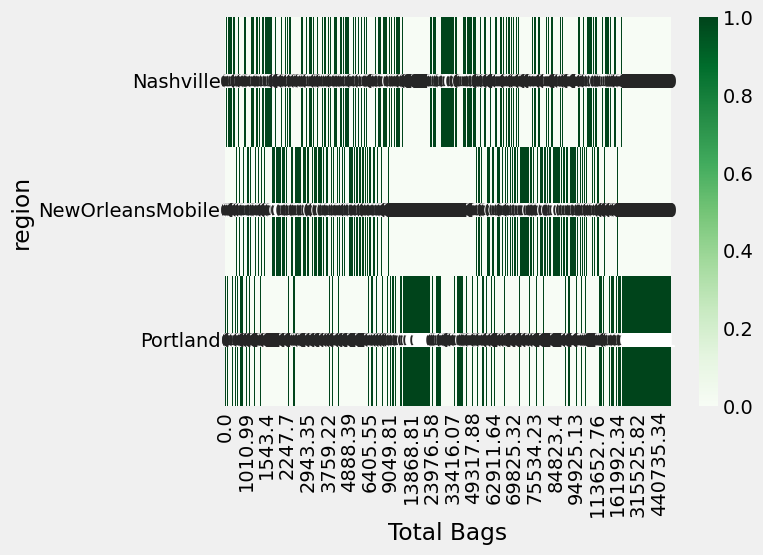

In [382]:
# Visualize the contingency table
sns.heatmap(table, cmap='Greens', annot=True, fmt='d')

In [383]:
# Perform a chi-square test
chi2, p, dof, expected = chi2_contingency(table)
print('Chi-square test statistic:', chi2)
print('P-value:', p)

Chi-square test statistic: 2028.0000000000005
P-value: 0.4832966473545084


In [407]:
#p-value of 0.483 suggests that there is not enough evidence to reject the null hypothesis and there is no significant association between 2 variables being tested


### Check for sample size:

In [386]:
counts = avocado_elevation['region'].value_counts()
print(counts)

Nashville           338
NewOrleansMobile    338
Portland            338
Name: region, dtype: int64


### Check for expected cell count:

In [388]:
# Create a contingency table
table2 = pd.crosstab(avocado_elevation['region'], avocado_elevation['Total Bags'])

# Perform a chi-square test and calculate the expected cell counts
chi2, p, dof, expected = chi2_contingency(table2)
print('Expected cell counts:')
print(expected)

Expected cell counts:
[[0.33333333 0.33333333 0.33333333 ... 0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333 ... 0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333 ... 0.33333333 0.33333333 0.33333333]]


### Check the level of measurement

In [384]:
print(avocado_elevation.dtypes)

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
elevation        object
regionR           int64
dtype: object


### Post-Hoc

In [397]:
# Perform a post-hoc analysis
postHocResults_ele = MultiComparison(avocado_elevation["Total Bags"], avocado_elevation["region"]).tukeyhsd()
print(postHocResults_ele)

# Print the results
print('Chi-square test statistic:', chi2)
print('P-value:', p)
print('Post-hoc results:')


                Multiple Comparison of Means - Tukey HSD, FWER=0.05                
     group1           group2        meandiff  p-adj     lower       upper    reject
-----------------------------------------------------------------------------------
       Nashville NewOrleansMobile   3851.4027 0.8814 -15034.2933  22737.0986  False
       Nashville         Portland 108098.2043    0.0  89212.5084 126983.9003   True
NewOrleansMobile         Portland 104246.8017    0.0  85361.1057 123132.4976   True
-----------------------------------------------------------------------------------
Chi-square test statistic: 2028.0000000000005
P-value: 0.4832966473545084
Post-hoc results:


In [408]:
#The results show that the mean difference between Nashville and NewOrleansMobile is not significant, but both Nashville and NewOrleansMobile have significantly different means when compared to Portland. 
